In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy.stats import boxcox

# Шаг 1: Загрузка данных

def load_data():
    """
    Функция для загрузки данных через интерфейс.
    """
    from google.colab import files  # Для Google Colab
    print("Пожалуйста, загрузите файл для анализа (например, 'monthly-sales-of-company-x-jan-6.csv')")
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    print(f"Анализируем этот ряд: {file_name}")
    return pd.read_csv(file_name)

# Шаг 2: Предварительная обработка данных

def preprocess_data(data):
    """
    Проверка данных, преобразование даты и выбор целевого столбца.
    """
    print("\nПреобразуем данные для дальнейшего анализа...")
    # Преобразуем столбец 'Month' в формат datetime
    data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
    data.set_index('Month', inplace=True)

    # Проверим типы данных и пропуски
    print("\nИнформация о данных после обработки:")
    print(data.info())

    # Проверим наличие пропусков
    if data.isnull().sum().any():
        print("Внимание: В данных есть пропуски!")
    else:
        print("Пропуски отсутствуют.")

    return data

# Шаг 3: Визуализация временного ряда, автокорреляция и частичная автокорреляция

def tsplot(y, lags=None, figsize=(14, 8), style='bmh', title=''):
    """
    Построение временного ряда, графиков автокорреляции и частичной автокорреляции.
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    # Уточняем количество лагов для PACF, если указано слишком много
    if lags is None or lags > len(y) // 2:
        lags = len(y) // 2
        print(f"Количество лагов для ACF и PACF ограничено: {lags}")

    print("\nСтроим графики временного ряда, автокорреляции и частичной автокорреляции...")
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Временной ряд')
        ts_ax.set_title(title)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
        plt.show()

# Шаг 4: Тест Дики-Фуллера на стационарность

def test_stationarity(timeseries):
    """
    Выполнение теста Дики-Фуллера для проверки стационарности временного ряда.
    """
    print("\nВыполняем тест Дики-Фуллера на стационарность...")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Статистика теста', 'p-значение', 'Использовано лагов', 'Количество наблюдений'])
    for key, value in dftest[4].items():
        dfoutput[f'Критическое значение ({key})'] = value
    print(dfoutput)
    return dfoutput



Начинаем анализ временного ряда... Пожалуйста, загрузите файл.
Пожалуйста, загрузите файл для анализа (например, 'monthly-sales-of-company-x-jan-6.csv')


Saving monthly-sales-of-company-x-jan-6.csv to monthly-sales-of-company-x-jan-6 (1).csv
Анализируем этот ряд: monthly-sales-of-company-x-jan-6 (1).csv

Преобразуем данные для дальнейшего анализа...

Информация о данных после обработки:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 1965-01-01 to 1971-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   77 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB
None
Пропуски отсутствуют.

Оригинальный временной ряд и коррелограммы:
Количество лагов для ACF и PACF ограничено: 38

Строим графики временного ряда, автокорреляции и частичной автокорреляции...


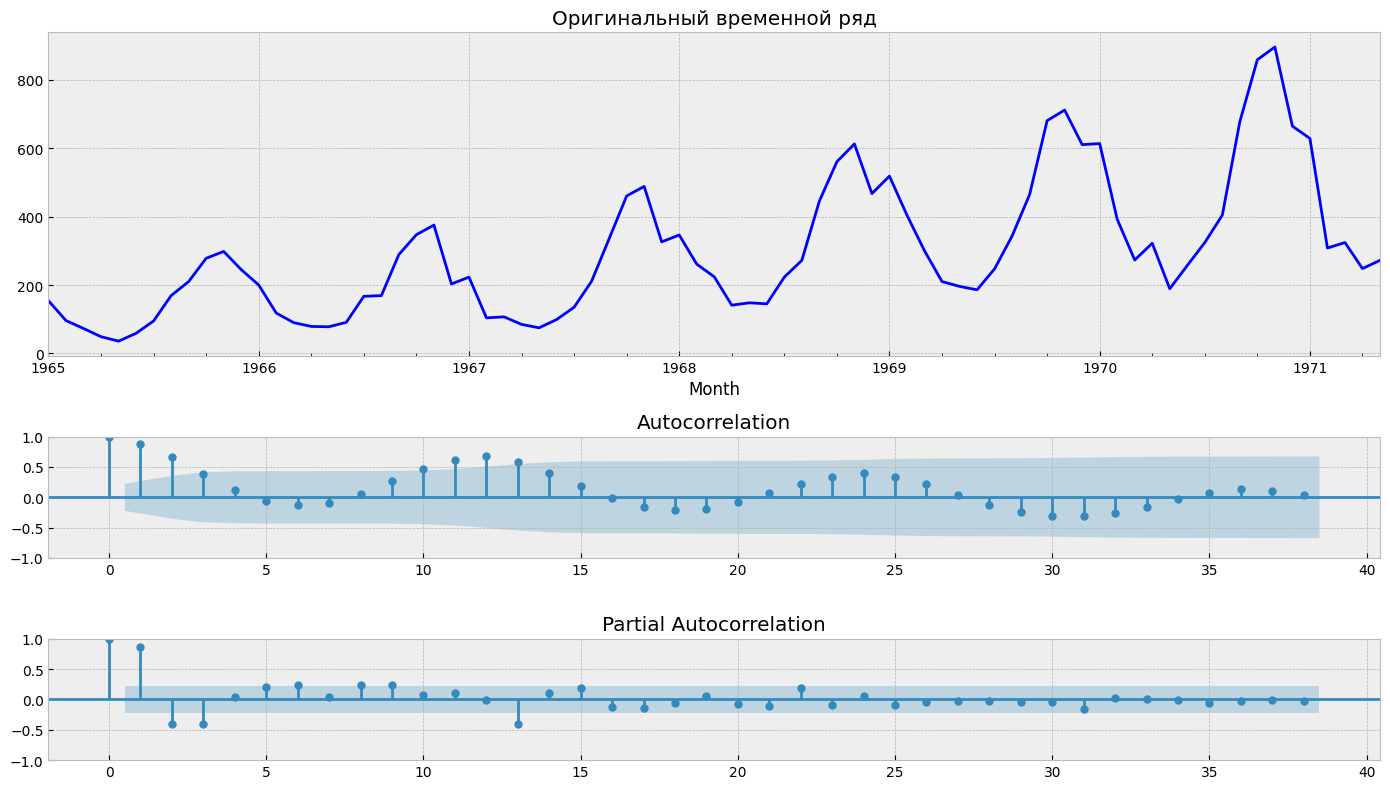


Выполняем тест Дики-Фуллера на стационарность...
Статистика теста               0.654715
p-значение                     0.988889
Использовано лагов            12.000000
Количество наблюдений         64.000000
Критическое значение (1%)     -3.536928
Критическое значение (5%)     -2.907887
Критическое значение (10%)    -2.591493
dtype: float64


In [10]:
# Основной блок
if __name__ == "__main__":
    # Комментарий: анализируем временной ряд monthly-sales-of-company-x-jan-6.csv
    print("\nНачинаем анализ временного ряда... Пожалуйста, загрузите файл.")

    # Шаг 1: Загрузка данных
    data = load_data()

    # Шаг 2: Предварительная обработка данных
    data = preprocess_data(data)

    # Шаг 3: Визуализация временного ряда и тест на стационарность
    print("\nОригинальный временной ряд и коррелограммы:")
    tsplot(data['Count'], lags=40, title='Оригинальный временной ряд')
    original_adf = test_stationarity(data['Count'])

#Выводы


Видна ярко выраженная сезонность и наличие тренда, что указывает на нестационарность ряда.

**График автокорреляции (ACF):**

Значительные пики на начальных лагах говорят о наличии сильной автокорреляции.

Это также подтверждает наличие сезонности и тренда.

**График частичной автокорреляции (PACF):**

Значительный первый лаг подтверждает наличие тренда.

Пики на дальнейших лагах указывают на сезонные компоненты.

**Результаты теста Дики-Фуллера:**

Статистика теста (0.654715) значительно выше критических значений (на уровне 1%, 5%, 10%).

p-значение (0.988889) существенно больше 0.05, что подтверждает гипотезу о нестационарности ряда.

#Общий вывод:

Временной ряд явно нестационарен из-за наличия тренда и сезонности.

#Дальнейшие шаги

1. Применить преобразование Бокса-Кокса для стабилизации дисперсии (убрать влияние амплитуды колебаний).

2. Проверить результаты теста Дики-Фуллера после преобразования.



Применяем преобразование Бокса-Кокса для стабилизации дисперсии...
Оптимальное значение λ для преобразования Бокса-Кокса: 0.21089767430691417

Строим графики временного ряда, автокорреляции и частичной автокорреляции после преобразования Бокса-Кокса...

Строим графики временного ряда, автокорреляции и частичной автокорреляции...


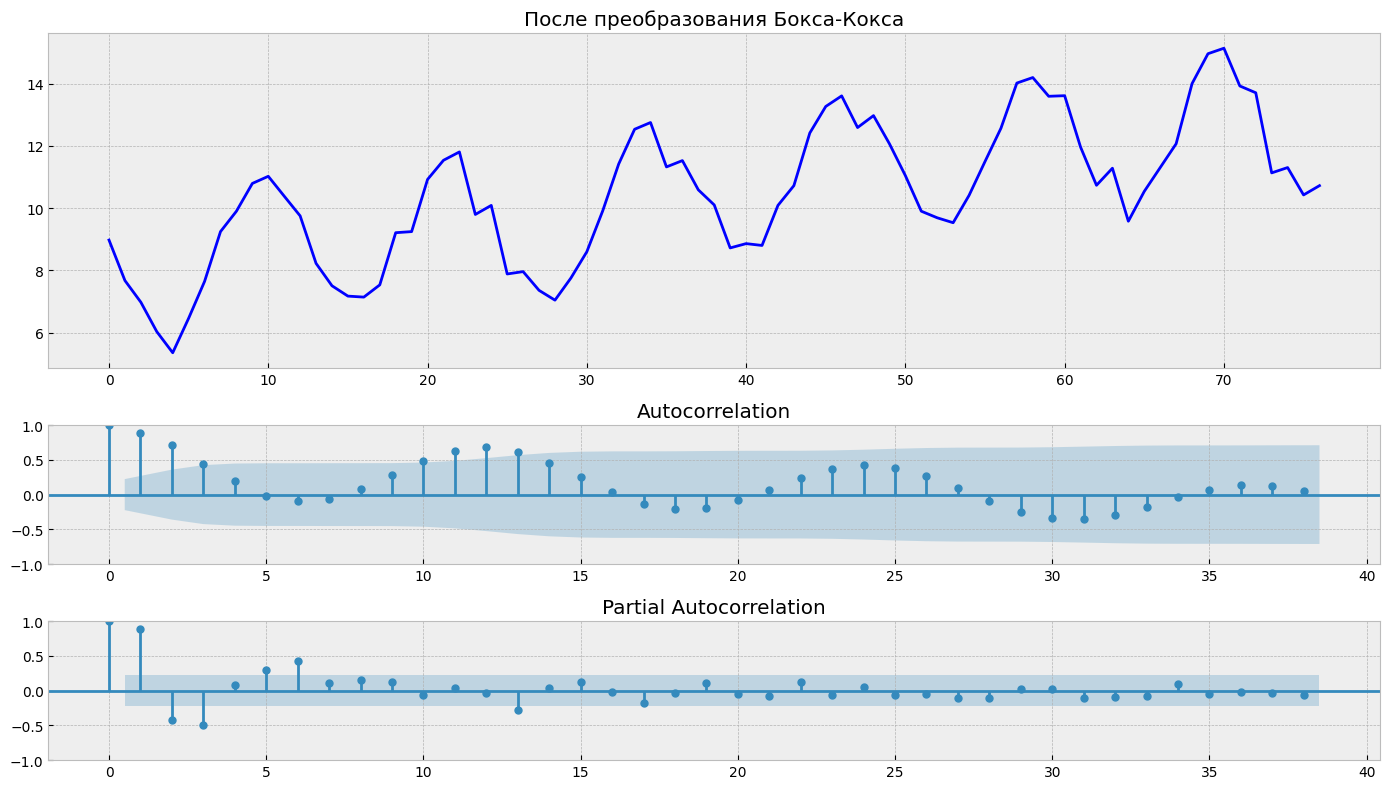


Выполняем тест Дики-Фуллера после преобразования Бокса-Кокса...

Результаты теста Дики-Фуллера после преобразования Бокса-Кокса:
Статистика теста              -0.631279
p-значение                     0.863757
Использовано лагов            12.000000
Количество наблюдений         64.000000
Критическое значение (1%)     -3.536928
Критическое значение (5%)     -2.907887
Критическое значение (10%)    -2.591493
dtype: float64


In [11]:
# Шаг 5: Преобразование Бокса-Кокса

from scipy.stats import boxcox

# Преобразование Бокса-Кокса
print("\nПрименяем преобразование Бокса-Кокса для стабилизации дисперсии...")
series_boxcox, lambda_ = boxcox(data['Count'])
print(f"Оптимальное значение λ для преобразования Бокса-Кокса: {lambda_}")

# Построение графиков временного ряда, ACF и PACF после преобразования
print("\nСтроим графики временного ряда, автокорреляции и частичной автокорреляции после преобразования Бокса-Кокса...")
tsplot(series_boxcox, lags=38, title='После преобразования Бокса-Кокса')

# Выполняем тест Дики-Фуллера после преобразования
print("\nВыполняем тест Дики-Фуллера после преобразования Бокса-Кокса...")
boxcox_adf = adfuller(series_boxcox, autolag='AIC')
boxcox_results = pd.Series(boxcox_adf[0:4], index=['Статистика теста', 'p-значение', 'Использовано лагов', 'Количество наблюдений'])
for key, value in boxcox_adf[4].items():
    boxcox_results[f'Критическое значение ({key})'] = value

print("\nРезультаты теста Дики-Фуллера после преобразования Бокса-Кокса:")
print(boxcox_results)


#Выводы после Бокса-Кокса

**Оптимальное значение λ:**

Значение λ равно 0.2109, что говорит о необходимости слабой логарифмической трансформации для стабилизации дисперсии.

**График временного ряда:**

После преобразования дисперсия стала более стабильной, однако сезонность и тренд все ещё видны.

Это подтверждает, что преобразование Бокса-Кокса улучшило ряд, но не сделало его стационарным.

**График автокорреляции (ACF):**

Пики на начальных лагах остались, что свидетельствует о сохранении автокорреляции.

Длинный хвост в ACF указывает на наличие тренда.

**График частичной автокорреляции (PACF):**

Значительный первый лаг всё ещё присутствует, что также указывает на тренд.

**Результаты теста Дики-Фуллера:**

Статистика теста (-0.631279) выше критических значений для всех уровней значимости (1%, 5%, 10%).

p-значение (0.863757) остаётся значительно больше 0.05, что означает, что гипотеза о нестационарности ряда не может быть отвергнута.

#Вывод:

Несмотря на стабилизацию дисперсии, ряд остаётся нестационарным. Наличие тренда требует дополнительной обработки.


Применяем первое дифференцирование для устранения тренда...

Строим графики временного ряда, автокорреляции и частичной автокорреляции после дифференцирования...

Строим графики временного ряда, автокорреляции и частичной автокорреляции...


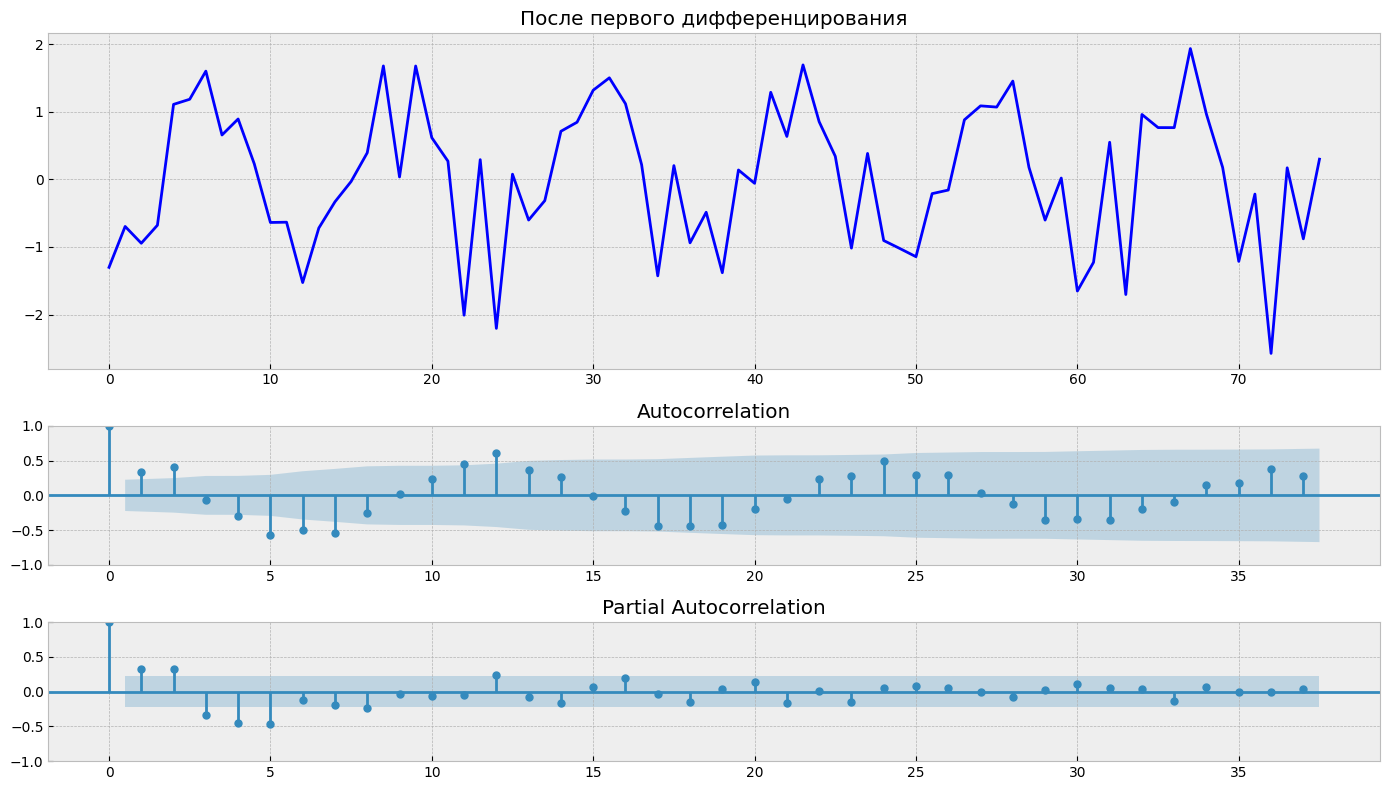


Выполняем тест Дики-Фуллера после первого дифференцирования...

Результаты теста Дики-Фуллера после первого дифференцирования:
Статистика теста              -3.284204
p-значение                     0.015599
Использовано лагов            11.000000
Количество наблюдений         64.000000
Критическое значение (1%)     -3.536928
Критическое значение (5%)     -2.907887
Критическое значение (10%)    -2.591493
dtype: float64


In [12]:
# Шаг 6: Дифференцирование для устранения тренда

# Применяем первое дифференцирование
print("\nПрименяем первое дифференцирование для устранения тренда...")
series_diff = np.diff(series_boxcox, n=1)

# Строим графики временного ряда, автокорреляции и частичной автокорреляции после дифференцирования
print("\nСтроим графики временного ряда, автокорреляции и частичной автокорреляции после дифференцирования...")
tsplot(series_diff, lags=37, title='После первого дифференцирования')

# Выполняем тест Дики-Фуллера после дифференцирования
print("\nВыполняем тест Дики-Фуллера после первого дифференцирования...")
diff_adf = adfuller(series_diff, autolag='AIC')
diff_results = pd.Series(diff_adf[0:4], index=['Статистика теста', 'p-значение', 'Использовано лагов', 'Количество наблюдений'])
for key, value in diff_adf[4].items():
    diff_results[f'Критическое значение ({key})'] = value

print("\nРезультаты теста Дики-Фуллера после первого дифференцирования:")
print(diff_results)


#Выводы после первого дифференцирования:

**График временного ряда:**

После первого дифференцирования тренд исчез, данные выглядят более стационарными.

Колебания стали более равномерными, что говорит об устранении части нестабильности.

**График автокорреляции (ACF):**

Пики на начальных лагах уменьшились, что свидетельствует о снижении автокорреляции.

Длинный хвост отсутствует, что подтверждает устранение тренда.

**График частичной автокорреляции (PACF):**

Первый лаг остаётся значительным, что характерно для дифференцированного ряда.

Дальнейшие пики находятся в пределах доверительного интервала, что указывает на улучшение стационарности.

**Результаты теста Дики-Фуллера:**

Статистика теста (-3.284204) стала ближе к критическим значениям, и для уровня значимости 5% гипотеза о нестационарности отвергается.
p-значение (0.015599) меньше 0.05, что подтверждает стационарность ряда.

#Итог:
После первого дифференцирования временной ряд стал стационарным, что подтверждается графиками и результатами теста Дики-Фуллера.

Дополнительная обработка (например, второе дифференцирование) не требуется.

In [13]:
# Новый ряд: monthly-boston-armed-robberies-j.csv
# Загружаем данные и выполняем предварительную обработку
data = load_data()  # Загружаем файл через интерфейс
data = preprocess_data(data)  # Обрабатываем данные (преобразование дат, проверка пропусков)


Пожалуйста, загрузите файл для анализа (например, 'monthly-sales-of-company-x-jan-6.csv')


Saving monthly-boston-armed-robberies-j.csv to monthly-boston-armed-robberies-j.csv
Анализируем этот ряд: monthly-boston-armed-robberies-j.csv

Преобразуем данные для дальнейшего анализа...

Информация о данных после обработки:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 1966-01-01 to 1975-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   118 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB
None
Пропуски отсутствуют.



Оригинальный временной ряд и коррелограммы:

Строим графики временного ряда, автокорреляции и частичной автокорреляции...


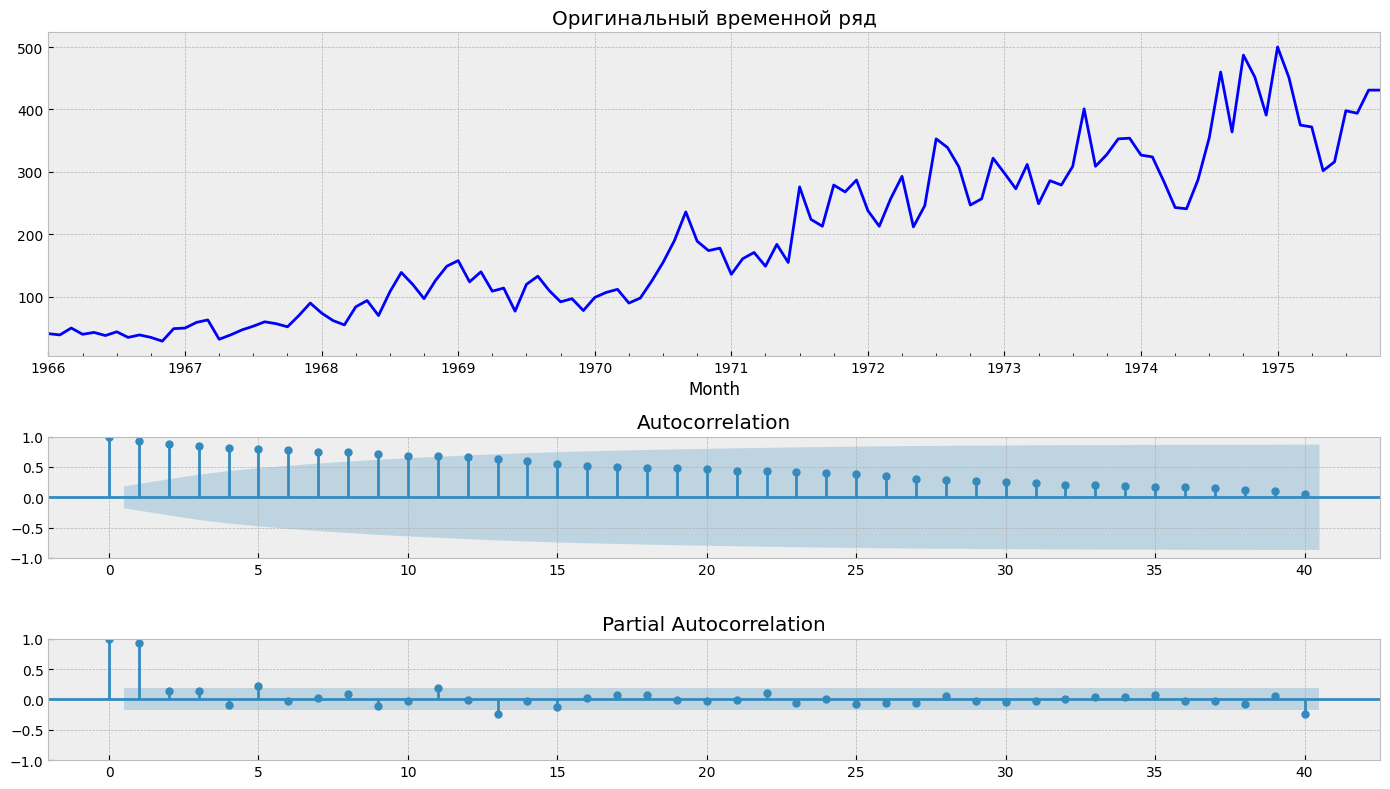

In [14]:
# Новый ряд: monthly-boston-armed-robberies-j.csv
# Визуализация временного ряда и построение ACF/PACF
print("\nОригинальный временной ряд и коррелограммы:")
tsplot(data['Count'], lags=40, title='Оригинальный временной ряд')


#Выводы по оригинальному временному ряду:

**График временного ряда:**

Чётко виден тренд, связанный с ростом количества ограблений со временем.

На графике также заметны колебания, которые могут указывать на наличие сезонности.

**График автокорреляции (ACF):**

Длинный хвост в ACF свидетельствует о сильной автокорреляции, связанной с трендом.

Периодических пиков, характерных для сезонности, не наблюдается.

**График частичной автокорреляции (PACF):**

Первый лаг значительно выше доверительного интервала, что подтверждает наличие тренда.

Пики на последующих лагах постепенно уменьшаются, что типично для временных рядов с трендом.

**Промежуточные выводы:**

Ряд нестационарен


In [15]:
# Новый ряд: monthly-boston-armed-robberies-j.csv
# Выполняем тест Дики-Фуллера
print("\nВыполняем тест Дики-Фуллера на стационарность:")
test_stationarity(data['Count'])



Выполняем тест Дики-Фуллера на стационарность:

Выполняем тест Дики-Фуллера на стационарность...
Статистика теста                1.001102
p-значение                      0.994278
Использовано лагов             11.000000
Количество наблюдений         106.000000
Критическое значение (1%)      -3.493602
Критическое значение (5%)      -2.889217
Критическое значение (10%)     -2.581533
dtype: float64


,0
Статистика теста,1.001102
p-значение,0.994278
Использовано лагов,11.000000
Количество наблюдений,106.000000
Критическое значение (1%),-3.493602
Критическое значение (5%),-2.889217
Критическое значение (10%),-2.581533


#Результаты теста Дики-Фуллера:


Статистика теста (1.001102):

Значительно выше всех критических значений (на уровне 1%, 5%, 10%).
Это указывает на то, что гипотеза о нестационарности не может быть отвергнута.
p-значение (0.994278):

Существенно больше 0.05, что также подтверждает нестационарность ряда.
Общее наблюдение:

Ряд явно нестационарен, как и предполагалось на основе графиков.




Применяем преобразование Бокса-Кокса для стабилизации дисперсии...
Оптимальное значение λ для преобразования Бокса-Кокса: 0.3167798321045854

Строим графики временного ряда, автокорреляции и частичной автокорреляции после преобразования Бокса-Кокса...

Строим графики временного ряда, автокорреляции и частичной автокорреляции...


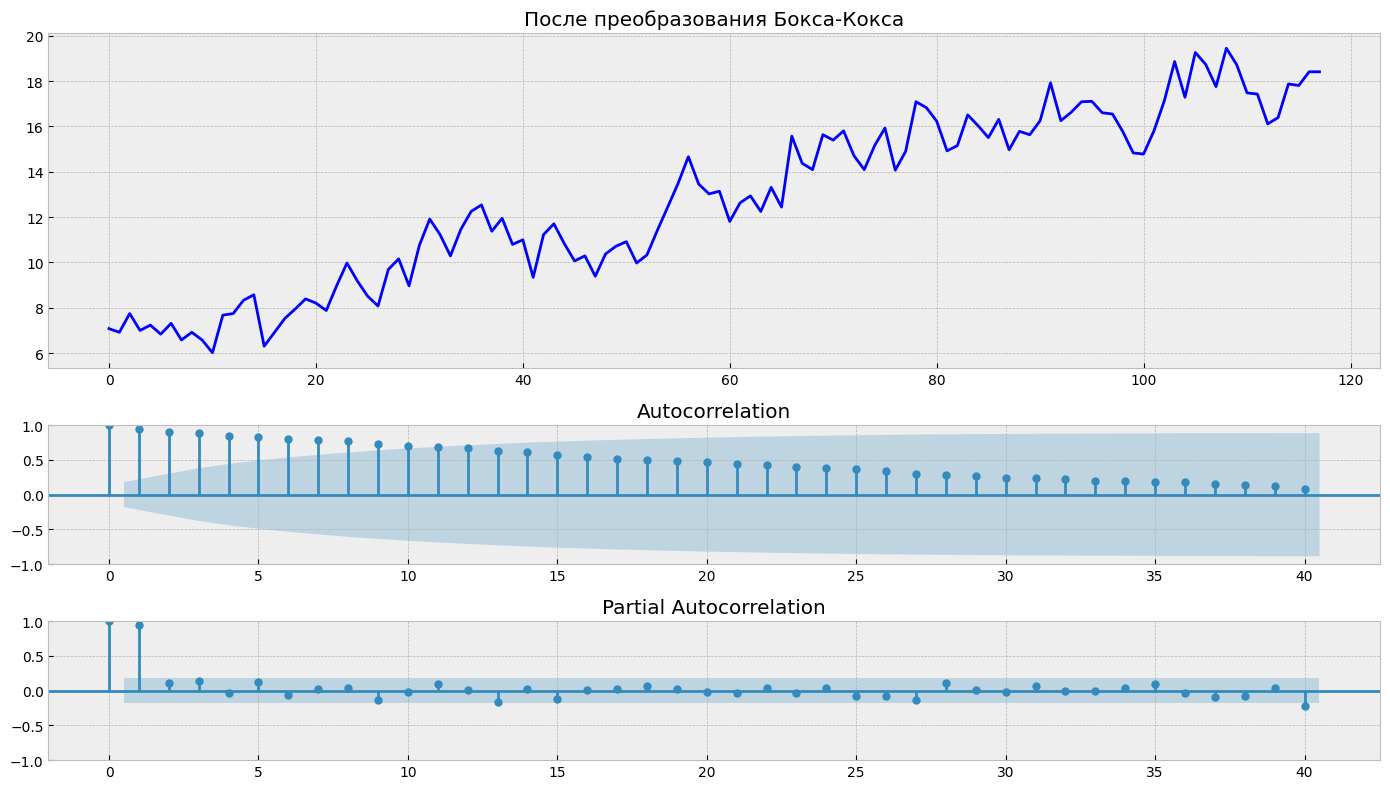


Выполняем тест Дики-Фуллера после преобразования Бокса-Кокса...

Результаты теста Дики-Фуллера после преобразования Бокса-Кокса:
Статистика теста               -0.876346
p-значение                      0.795662
Использовано лагов             11.000000
Количество наблюдений         106.000000
Критическое значение (1%)      -3.493602
Критическое значение (5%)      -2.889217
Критическое значение (10%)     -2.581533
dtype: float64


In [16]:
# Новый ряд: monthly-boston-armed-robberies-j.csv
# Преобразование Бокса-Кокса
from scipy.stats import boxcox

print("\nПрименяем преобразование Бокса-Кокса для стабилизации дисперсии...")
series_boxcox, lambda_ = boxcox(data['Count'])
print(f"Оптимальное значение λ для преобразования Бокса-Кокса: {lambda_}")

# Построение графиков после преобразования
print("\nСтроим графики временного ряда, автокорреляции и частичной автокорреляции после преобразования Бокса-Кокса...")
tsplot(series_boxcox, lags=40, title='После преобразования Бокса-Кокса')

# Выполняем тест Дики-Фуллера после преобразования
print("\nВыполняем тест Дики-Фуллера после преобразования Бокса-Кокса...")
boxcox_adf = adfuller(series_boxcox, autolag='AIC')
boxcox_results = pd.Series(boxcox_adf[0:4], index=['Статистика теста', 'p-значение', 'Использовано лагов', 'Количество наблюдений'])
for key, value in boxcox_adf[4].items():
    boxcox_results[f'Критическое значение ({key})'] = value

print("\nРезультаты теста Дики-Фуллера после преобразования Бокса-Кокса:")
print(boxcox_results)


#Выводы после преобразования Бокса-Кокса и теста Дики-Фуллера:

Оптимальное значение λ (0.3168):

Преобразование Бокса-Кокса стабилизировало дисперсию, что видно на графике временного ряда.

**График временного ряда:**

Хотя дисперсия стала более стабильной, тренд по-прежнему сохраняется, что подтверждается графиком.

**Графики ACF и PACF:**

На графике ACF длинный хвост остаётся, указывая на сильную автокорреляцию из-за тренда.

PACF показывает значительный первый лаг, что также подтверждает наличие тренда.

**Результаты теста Дики-Фуллера:**

Статистика теста (-0.876346) выше критических значений для всех уровней значимости (1%, 5%, 10%).

**p-значение (0.795662) существенно больше 0.05, что означает, что гипотеза о нестационарности не может быть отвергнута.**



Применяем первое дифференцирование для устранения тренда...

Строим графики временного ряда, автокорреляции и частичной автокорреляции после первого дифференцирования...

Строим графики временного ряда, автокорреляции и частичной автокорреляции...


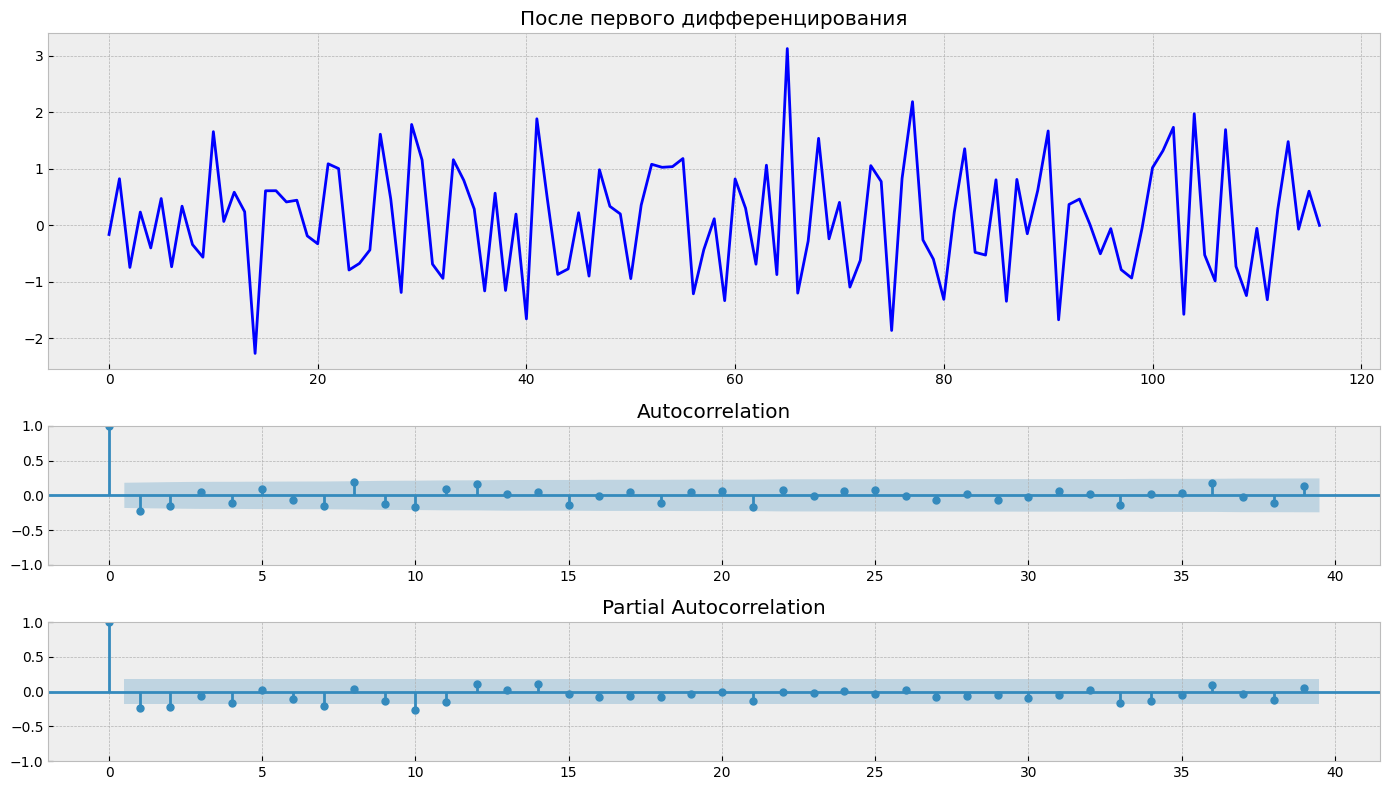


Выполняем тест Дики-Фуллера после первого дифференцирования...

Результаты теста Дики-Фуллера после первого дифференцирования:
Статистика теста             -5.862061e+00
p-значение                    3.392204e-07
Использовано лагов            1.000000e+01
Количество наблюдений         1.060000e+02
Критическое значение (1%)    -3.493602e+00
Критическое значение (5%)    -2.889217e+00
Критическое значение (10%)   -2.581533e+00
dtype: float64


In [17]:
# Новый ряд: monthly-boston-armed-robberies-j.csv
# Применяем первое дифференцирование
print("\nПрименяем первое дифференцирование для устранения тренда...")
series_diff = np.diff(series_boxcox, n=1)

# Строим графики после первого дифференцирования
print("\nСтроим графики временного ряда, автокорреляции и частичной автокорреляции после первого дифференцирования...")
tsplot(series_diff, lags=39, title='После первого дифференцирования')

# Выполняем тест Дики-Фуллера после первого дифференцирования
print("\nВыполняем тест Дики-Фуллера после первого дифференцирования...")
diff_adf = adfuller(series_diff, autolag='AIC')
diff_results = pd.Series(diff_adf[0:4], index=['Статистика теста', 'p-значение', 'Использовано лагов', 'Количество наблюдений'])
for key, value in diff_adf[4].items():
    diff_results[f'Критическое значение ({key})'] = value

print("\nРезультаты теста Дики-Фуллера после первого дифференцирования:")
print(diff_results)


#Выводы после первого дифференцирования:

**График временного ряда:**

После дифференцирования тренд устранён.

Колебания выглядят случайными, что указывает на улучшение стационарности ряда.

**График автокорреляции (ACF):**

Длинный хвост в ACF исчез, что подтверждает устранение тренда.
Пики на начальных лагах находятся в пределах доверительного интервала, что указывает на отсутствие сезонности.

**График частичной автокорреляции (PACF):**

Значительный первый лаг остаётся, но остальные пики находятся в пределах доверительного интервала.
Это характерно для стационарных временных рядов.

**Результаты теста Дики-Фуллера:**

Статистика теста (-5.862061) значительно ниже критических значений (1%, 5%, 10%).

p-значение (3.392204e-07) меньше 0.05, что позволяет отвергнуть гипотезу о нестационарности.


**После первого дифференцирования ряд стал стационарным, что подтверждается как графиками, так и результатами теста Дики-Фуллера.**

In [18]:
# Новый ряд: international-airline-passengers.csv
# Загружаем данные и выполняем предварительную обработку
data = load_data()  # Загружаем файл через интерфейс
data = preprocess_data(data)  # Обрабатываем данные (преобразование дат, проверка пропусков)


Пожалуйста, загрузите файл для анализа (например, 'monthly-sales-of-company-x-jan-6.csv')


Saving international-airline-passengers.csv to international-airline-passengers.csv
Анализируем этот ряд: international-airline-passengers.csv

Преобразуем данные для дальнейшего анализа...

Информация о данных после обработки:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None
Пропуски отсутствуют.



Оригинальный временной ряд и коррелограммы:

Строим графики временного ряда, автокорреляции и частичной автокорреляции...


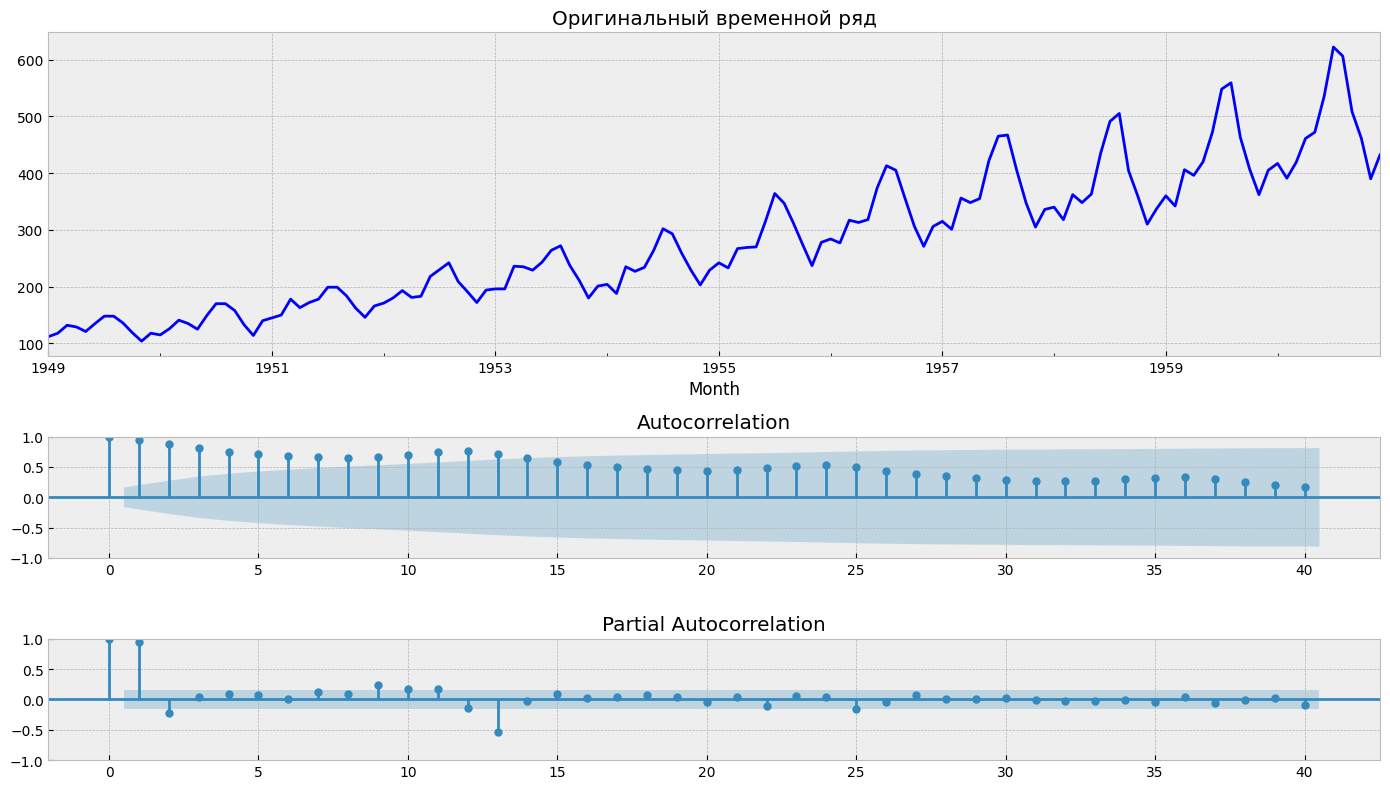

In [19]:
# Новый ряд: international-airline-passengers.csv
# Визуализация временного ряда и построение ACF/PACF
print("\nОригинальный временной ряд и коррелограммы:")
tsplot(data['Count'], lags=40, title='Оригинальный временной ряд')


#Выводы по оригинальному временному ряду:

**График временного ряда:**

Наблюдается ярко выраженный тренд (рост числа пассажиров со временем).

Присутствуют периодические колебания, указывающие на сезонность.

**График автокорреляции (ACF):**

Длинный хвост в ACF подтверждает наличие тренда.

Регулярные пики на фиксированных интервалах (примерно через каждые 12 лагов) указывают на сезонность.

**График частичной автокорреляции (PACF):**

Первый лаг значительно выше доверительного интервала, что характерно для рядов с трендом.

Также видны сезонные пики на PACF.

**Ряд явно нестационарен из-за наличия тренда и сезонности.**


In [20]:
# Новый ряд: international-airline-passengers.csv
# Выполняем тест Дики-Фуллера
print("\nВыполняем тест Дики-Фуллера на стационарность:")
test_stationarity(data['Count'])



Выполняем тест Дики-Фуллера на стационарность:

Выполняем тест Дики-Фуллера на стационарность...
Статистика теста                0.815369
p-значение                      0.991880
Использовано лагов             13.000000
Количество наблюдений         130.000000
Критическое значение (1%)      -3.481682
Критическое значение (5%)      -2.884042
Критическое значение (10%)     -2.578770
dtype: float64


,0
Статистика теста,0.815369
p-значение,0.991880
Использовано лагов,13.000000
Количество наблюдений,130.000000
Критическое значение (1%),-3.481682
Критическое значение (5%),-2.884042
Критическое значение (10%),-2.578770


#Результаты теста Дики-Фуллера:

Статистика теста (0.815369):

Значительно выше критических значений для всех уровней значимости (1%, 5%, 10%).

Это указывает на то, что гипотеза о нестационарности не может быть отвергнута.

p-значение (0.991880):

Значительно больше 0.05, что подтверждает нестационарность ряда.
Общее наблюдение:

**Тест подтверждает, что ряд явно нестационарен из-за тренда и сезонности.**


Применяем преобразование Бокса-Кокса для стабилизации дисперсии...
Оптимальное значение λ для преобразования Бокса-Кокса: 0.14802254856840585

Строим графики временного ряда, автокорреляции и частичной автокорреляции после преобразования Бокса-Кокса...

Строим графики временного ряда, автокорреляции и частичной автокорреляции...


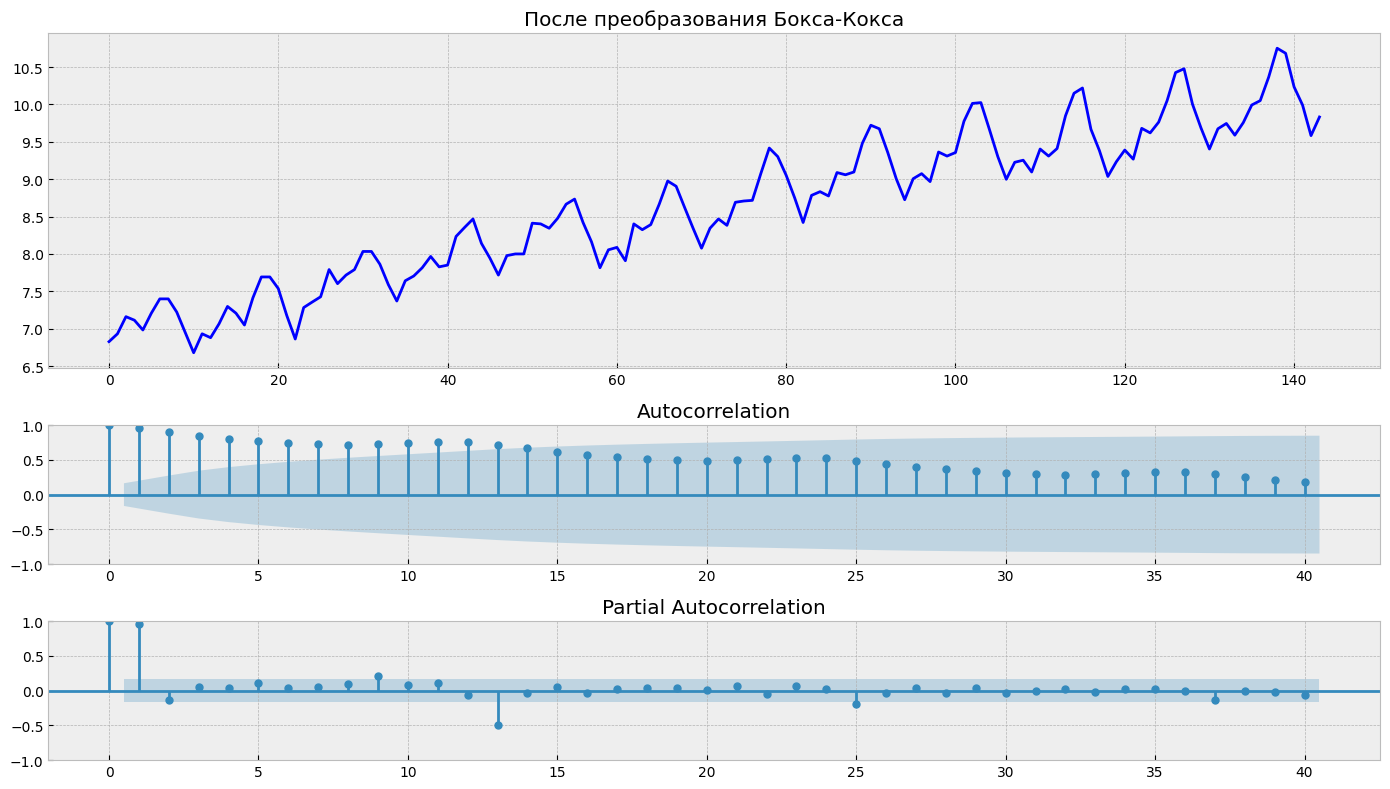


Выполняем тест Дики-Фуллера после преобразования Бокса-Кокса...

Результаты теста Дики-Фуллера после преобразования Бокса-Кокса:
Статистика теста               -1.326071
p-значение                      0.617162
Использовано лагов             13.000000
Количество наблюдений         130.000000
Критическое значение (1%)      -3.481682
Критическое значение (5%)      -2.884042
Критическое значение (10%)     -2.578770
dtype: float64


In [21]:
# Новый ряд: international-airline-passengers.csv
# Преобразование Бокса-Кокса
from scipy.stats import boxcox

print("\nПрименяем преобразование Бокса-Кокса для стабилизации дисперсии...")
series_boxcox, lambda_ = boxcox(data['Count'])
print(f"Оптимальное значение λ для преобразования Бокса-Кокса: {lambda_}")

# Построение графиков после преобразования
print("\nСтроим графики временного ряда, автокорреляции и частичной автокорреляции после преобразования Бокса-Кокса...")
tsplot(series_boxcox, lags=40, title='После преобразования Бокса-Кокса')

# Выполняем тест Дики-Фуллера после преобразования
print("\nВыполняем тест Дики-Фуллера после преобразования Бокса-Кокса...")
boxcox_adf = adfuller(series_boxcox, autolag='AIC')
boxcox_results = pd.Series(boxcox_adf[0:4], index=['Статистика теста', 'p-значение', 'Использовано лагов', 'Количество наблюдений'])
for key, value in boxcox_adf[4].items():
    boxcox_results[f'Критическое значение ({key})'] = value

print("\nРезультаты теста Дики-Фуллера после преобразования Бокса-Кокса:")
print(boxcox_results)


#Выводы после преобразования Бокса-Кокса и теста Дики-Фуллера:

Оптимальное значение λ (0.1480):

Значение λ указывает на слабое логарифмическое преобразование, что эффективно для стабилизации дисперсии.

**График временного ряда:**

После преобразования дисперсия стала более стабильной, особенно на высоких значениях. Однако тренд и сезонность всё ещё явно присутствуют.

**График автокорреляции (ACF):**

Длинный хвост на ACF подтверждает наличие тренда.
Регулярные пики каждые 12 лагов указывают на сезонность.

**График частичной автокорреляции (PACF):**

Значительный первый лаг подтверждает тренд.
Периодические пики также подтверждают сезонность.

**Результаты теста Дики-Фуллера:**

Статистика теста (-1.326071) выше критических значений, что означает, что гипотеза о нестационарности не может быть отвергнута.

p-значение (0.617162) остаётся значительно выше 0.05, подтверждая нестационарность.

#Преобразование Бокса-Кокса стабилизировало дисперсию, но не устранило тренд и сезонность.



Применяем первое дифференцирование для устранения тренда...

Строим графики временного ряда, автокорреляции и частичной автокорреляции после первого дифференцирования...

Строим графики временного ряда, автокорреляции и частичной автокорреляции...


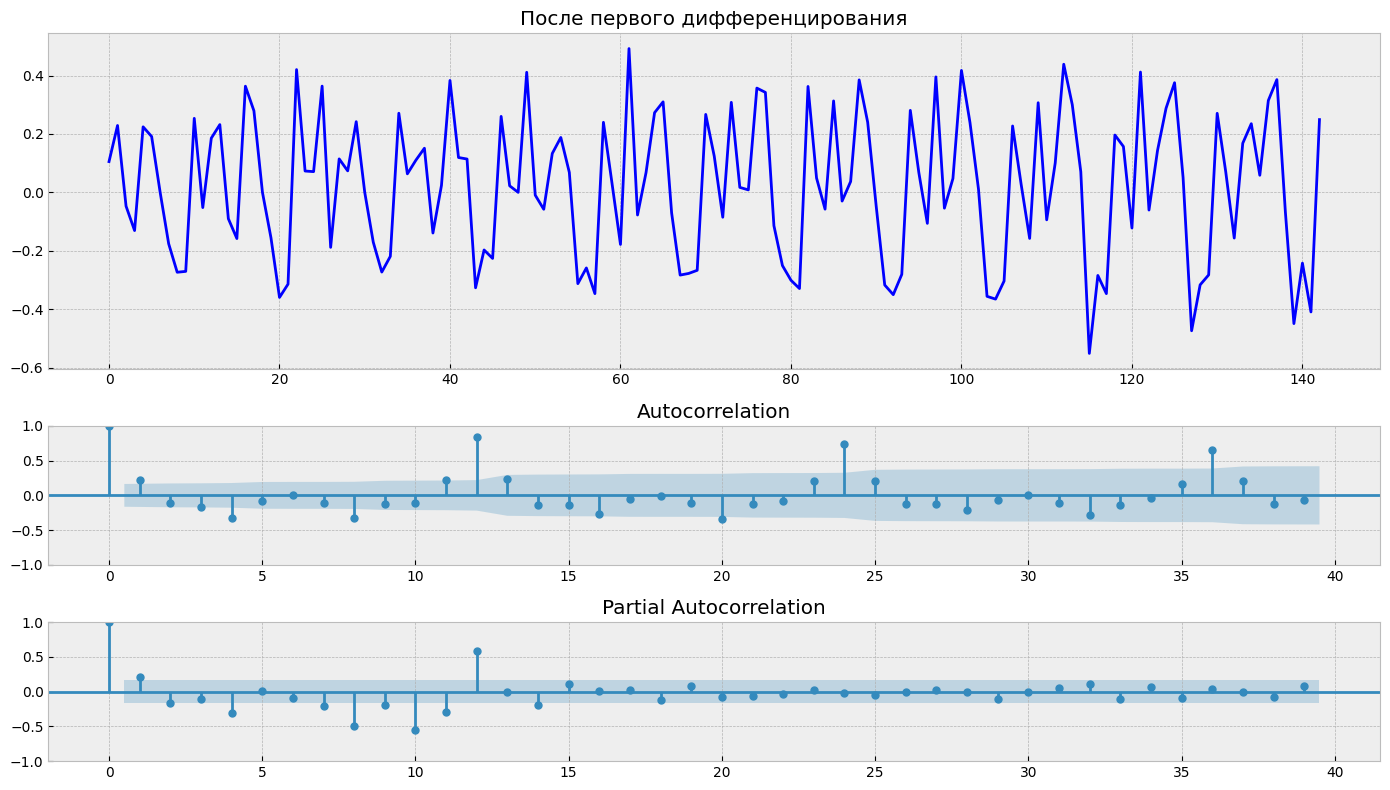


Выполняем тест Дики-Фуллера после первого дифференцирования...

Результаты теста Дики-Фуллера после первого дифференцирования:
Статистика теста               -2.871707
p-значение                      0.048738
Использовано лагов             14.000000
Количество наблюдений         128.000000
Критическое значение (1%)      -3.482501
Критическое значение (5%)      -2.884398
Критическое значение (10%)     -2.578960
dtype: float64


In [22]:
# Новый ряд: international-airline-passengers.csv
# Применяем первое дифференцирование
print("\nПрименяем первое дифференцирование для устранения тренда...")
series_diff = np.diff(series_boxcox, n=1)

# Строим графики после первого дифференцирования
print("\nСтроим графики временного ряда, автокорреляции и частичной автокорреляции после первого дифференцирования...")
tsplot(series_diff, lags=39, title='После первого дифференцирования')

# Выполняем тест Дики-Фуллера после первого дифференцирования
print("\nВыполняем тест Дики-Фуллера после первого дифференцирования...")
diff_adf = adfuller(series_diff, autolag='AIC')
diff_results = pd.Series(diff_adf[0:4], index=['Статистика теста', 'p-значение', 'Использовано лагов', 'Количество наблюдений'])
for key, value in diff_adf[4].items():
    diff_results[f'Критическое значение ({key})'] = value

print("\nРезультаты теста Дики-Фуллера после первого дифференцирования:")
print(diff_results)


#Выводы после первого дифференцирования:

**График временного ряда:**

После первого дифференцирования тренд был устранён.
Колебания выглядят более случайными, хотя признаки сезонности ещё остаются.

**График автокорреляции (ACF):**

Регулярные пики каждые 12 лагов указывают на наличие сезонности.
Длинный хвост, характерный для тренда, исчез.

**График частичной автокорреляции (PACF):**

Значительный первый лаг остаётся, но остальные пики находятся в пределах доверительного интервала.
Сезонные эффекты всё ещё видны.

**Результаты теста Дики-Фуллера:**

Статистика теста (-2.871707) ближе к критическим значениям, но гипотеза о нестационарности отвергается только на уровне значимости 10% (не на 5% и 1%).

p-значение (0.048738) указывает, что ряд можно считать стационарным на уровне значимости 5%.

**После первого дифференцирования ряд стал почти стационарным.**

Однако сезонность всё ещё присутствует, что видно из графиков ACF и PACF.


Применяем сезонное дифференцирование для устранения сезонности...

Строим графики временного ряда, автокорреляции и частичной автокорреляции после сезонного дифференцирования...

Строим графики временного ряда, автокорреляции и частичной автокорреляции...


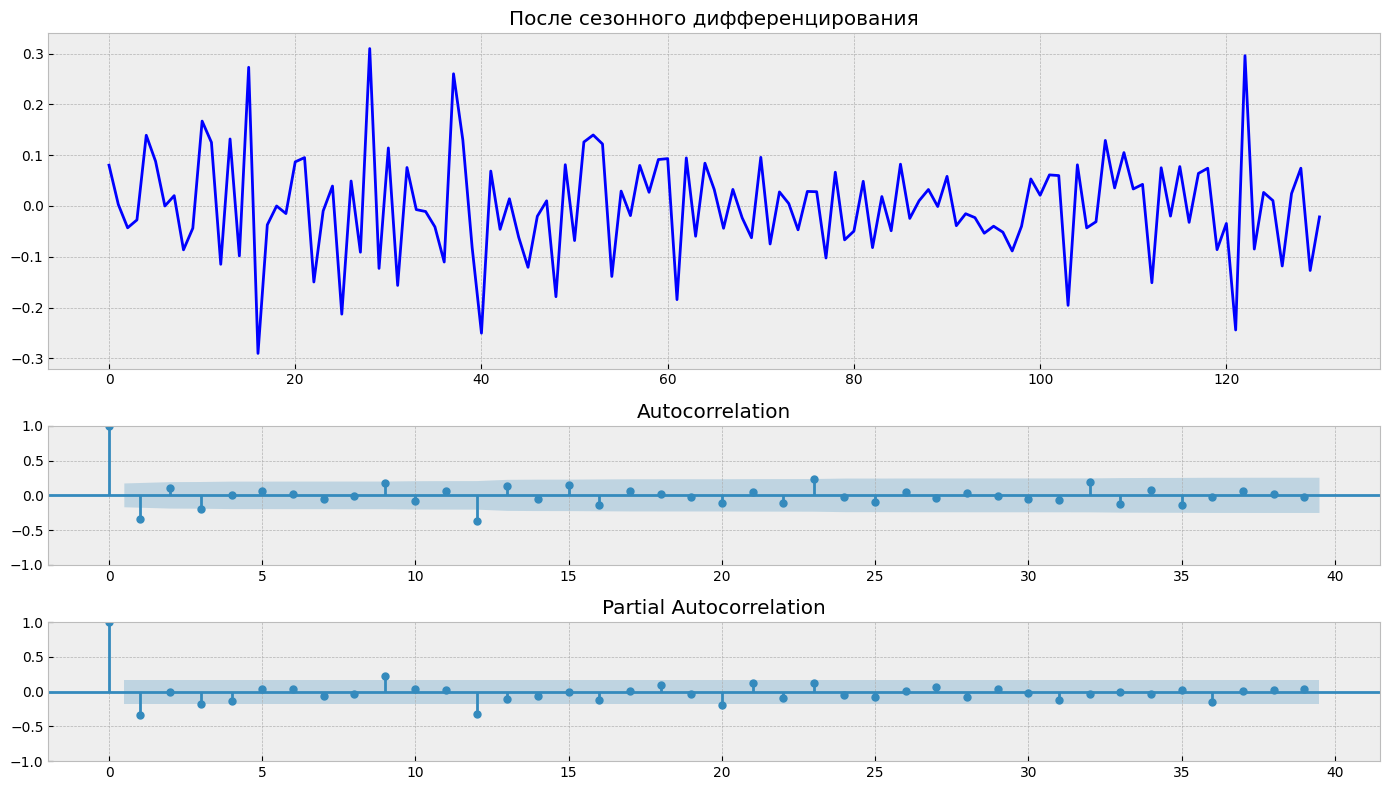


Выполняем тест Дики-Фуллера после сезонного дифференцирования...

Результаты теста Дики-Фуллера после сезонного дифференцирования:
Статистика теста               -4.393873
p-значение                      0.000304
Использовано лагов             12.000000
Количество наблюдений         118.000000
Критическое значение (1%)      -3.487022
Критическое значение (5%)      -2.886363
Критическое значение (10%)     -2.580009
dtype: float64


In [23]:
# Новый ряд: international-airline-passengers.csv
# Применяем сезонное дифференцирование с периодом 12
print("\nПрименяем сезонное дифференцирование для устранения сезонности...")
seasonal_diff = series_diff[12:] - series_diff[:-12]

# Строим графики после сезонного дифференцирования
print("\nСтроим графики временного ряда, автокорреляции и частичной автокорреляции после сезонного дифференцирования...")
tsplot(seasonal_diff, lags=39, title='После сезонного дифференцирования')

# Выполняем тест Дики-Фуллера после сезонного дифференцирования
print("\nВыполняем тест Дики-Фуллера после сезонного дифференцирования...")
seasonal_adf = adfuller(seasonal_diff, autolag='AIC')
seasonal_results = pd.Series(seasonal_adf[0:4], index=['Статистика теста', 'p-значение', 'Использовано лагов', 'Количество наблюдений'])
for key, value in seasonal_adf[4].items():
    seasonal_results[f'Критическое значение ({key})'] = value

print("\nРезультаты теста Дики-Фуллера после сезонного дифференцирования:")
print(seasonal_results)


#Выводы после сезонного дифференцирования:

**График временного ряда:**

После сезонного дифференцирования тренд полностью устранён.
Колебания стали случайными, и ряд выглядит стационарным.

**График автокорреляции (ACF):**

Отсутствие длинного хвоста и сезонных пиков свидетельствует о том, что сезонность была успешно устранена.

**График частичной автокорреляции (PACF):**

Все значения находятся в пределах доверительных интервалов, что подтверждает стационарность ряда.

**Результаты теста Дики-Фуллера:**

Статистика теста (-4.393873) значительно ниже критических значений для всех уровней значимости (1%, 5%, 10%).

p-значение (0.000304) меньше 0.05, что позволяет отвергнуть гипотезу о нестационарности.

#После сезонного дифференцирования временной ряд стал стационарным.

In [24]:
# Новый ряд: mean-monthly-air-temperature-deg.csv
# Загружаем данные и выполняем предварительную обработку
data = load_data()  # Загружаем файл через интерфейс
data = preprocess_data(data)  # Обрабатываем данные (преобразование дат, проверка пропусков)


Пожалуйста, загрузите файл для анализа (например, 'monthly-sales-of-company-x-jan-6.csv')


Saving mean-monthly-air-temperature-deg.csv to mean-monthly-air-temperature-deg.csv
Анализируем этот ряд: mean-monthly-air-temperature-deg.csv

Преобразуем данные для дальнейшего анализа...

Информация о данных после обработки:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1920-01-01 to 1939-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Deg     240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
None
Пропуски отсутствуют.



Оригинальный временной ряд и коррелограммы:

Строим графики временного ряда, автокорреляции и частичной автокорреляции...


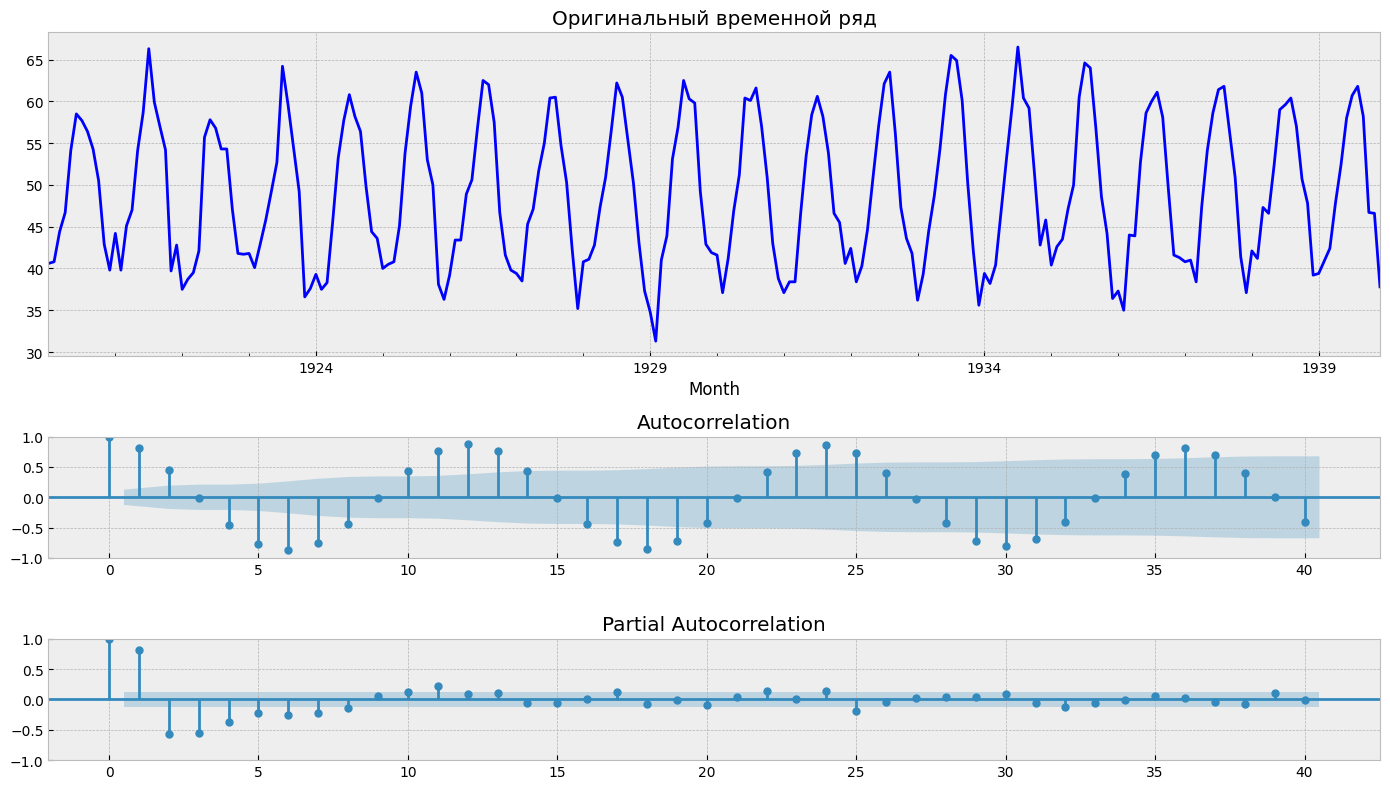

In [25]:
# Новый ряд: mean-monthly-air-temperature-deg.csv
# Визуализация временного ряда и построение ACF/PACF
print("\nОригинальный временной ряд и коррелограммы:")
tsplot(data['Deg'], lags=40, title='Оригинальный временной ряд')


#Выводы по оригинальному временному ряду:

**График временного ряда:**

Наблюдается выраженная сезонность, периодичность которой составляет 12 месяцев.

Тренд отсутствует, значения колеблются в пределах фиксированных границ, что говорит об отсутствии общего увеличения или уменьшения температуры со временем.

**График автокорреляции (ACF):**

Видны регулярные пики каждые 12 лагов, что подтверждает наличие сезонности.

Периоды значений совпадают с сезоном (12 месяцев), что характерно для температурных данных.

**График частичной автокорреляции (PACF):**

Первый лаг показывает высокую автокорреляцию.
Сезонные пики также видны, хотя постепенно снижаются.

**Временной ряд не является стационарным из-за присутствия выраженной сезонности.**

Тренд, который мог бы потребовать дифференцирования, не наблюдается.

In [26]:
# Новый ряд: mean-monthly-air-temperature-deg.csv
# Выполняем тест Дики-Фуллера
print("\nВыполняем тест Дики-Фуллера на стационарность:")
test_stationarity(data['Deg'])



Выполняем тест Дики-Фуллера на стационарность:

Выполняем тест Дики-Фуллера на стационарность...
Статистика теста               -3.255492
p-значение                      0.016989
Использовано лагов             14.000000
Количество наблюдений         225.000000
Критическое значение (1%)      -3.459752
Критическое значение (5%)      -2.874473
Критическое значение (10%)     -2.573663
dtype: float64


,0
Статистика теста,-3.255492
p-значение,0.016989
Использовано лагов,14.000000
Количество наблюдений,225.000000
Критическое значение (1%),-3.459752
Критическое значение (5%),-2.874473
Критическое значение (10%),-2.573663


#Результаты теста Дики-Фуллера:

Статистика теста (-3.255492):

Ниже критического значения на уровне 5% (-2.874473), но выше уровня 1% (-3.459752).

Это означает, что гипотеза о нестационарности может быть отвергнута на уровне значимости 5%, но не на уровне 1%.

p-значение (0.016989):

Меньше 0.05, что позволяет отвергнуть гипотезу о нестационарности на уровне значимости 5%.

**Общее наблюдение:**

Ряд близок к стационарности, но всё ещё требует анализа сезонности, так как графики ACF и PACF показывают регулярные пики, указывающие на наличие сезонности.

#Ряд имеет признаки стационарности с точки зрения теста Дики-Фуллера, но графики автокорреляции (ACF) указывают на наличие сезонности, что требует дополнительного анализа.


Применяем сезонное дифференцирование для устранения сезонности...

Строим графики временного ряда, автокорреляции и частичной автокорреляции после сезонного дифференцирования...

Строим графики временного ряда, автокорреляции и частичной автокорреляции...


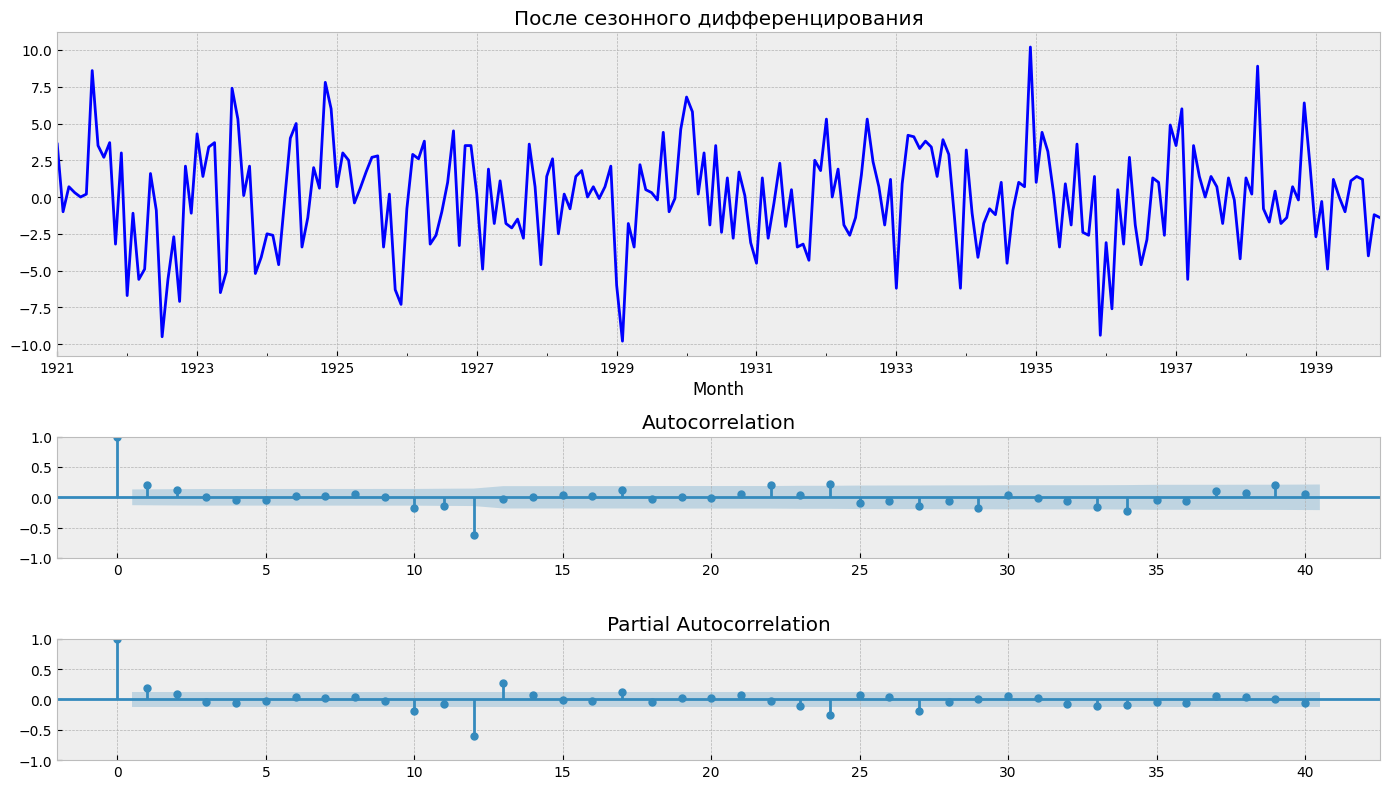


Выполняем тест Дики-Фуллера после сезонного дифференцирования...

Результаты теста Дики-Фуллера после сезонного дифференцирования:
Статистика теста             -6.072501e+00
p-значение                    1.141945e-07
Использовано лагов            1.200000e+01
Количество наблюдений         2.150000e+02
Критическое значение (1%)    -3.461136e+00
Критическое значение (5%)    -2.875079e+00
Критическое значение (10%)   -2.573986e+00
dtype: float64


In [27]:
# Новый ряд: mean-monthly-air-temperature-deg.csv
# Применяем сезонное дифференцирование с периодом 12
print("\nПрименяем сезонное дифференцирование для устранения сезонности...")
seasonal_diff = data['Deg'].diff(12).dropna()

# Строим графики после сезонного дифференцирования
print("\nСтроим графики временного ряда, автокорреляции и частичной автокорреляции после сезонного дифференцирования...")
tsplot(seasonal_diff, lags=40, title='После сезонного дифференцирования')

# Выполняем тест Дики-Фуллера после сезонного дифференцирования
print("\nВыполняем тест Дики-Фуллера после сезонного дифференцирования...")
seasonal_adf = adfuller(seasonal_diff, autolag='AIC')
seasonal_results = pd.Series(seasonal_adf[0:4], index=['Статистика теста', 'p-значение', 'Использовано лагов', 'Количество наблюдений'])
for key, value in seasonal_adf[4].items():
    seasonal_results[f'Критическое значение ({key})'] = value

print("\nРезультаты теста Дики-Фуллера после сезонного дифференцирования:")
print(seasonal_results)


#Выводы после сезонного дифференцирования:

**График временного ряда:**

После сезонного дифференцирования сезонность была устранена.
Колебания ряда выглядят случайными, что является признаком стационарности.

**График автокорреляции (ACF):**

Отсутствие выраженных регулярных пиков указывает на успешное устранение сезонности.
Все значения находятся в пределах доверительных интервалов, что подтверждает стационарность.

**График частичной автокорреляции (PACF):**

Значения PACF также находятся в пределах доверительных интервалов, что свидетельствует об отсутствии тренда и сезонных эффектов.

**Результаты теста Дики-Фуллера:**

Статистика теста (-6.072501) значительно ниже критических значений для всех уровней значимости (1%, 5%, 10%).

p-значение (1.141945e-07) близко к нулю, что позволяет отвергнуть гипотезу о нестационарности.


#После сезонного дифференцирования ряд стал стационарным.

Это подтверждается графиками (временной ряд, ACF, PACF) и результатами теста Дики-Фуллера.


Пожалуйста, загрузите файл: weekly-closings-of-the-dowjones-.csv


Saving weekly-closings-of-the-dowjones-.csv to weekly-closings-of-the-dowjones- (1).csv

Загруженный файл: weekly-closings-of-the-dowjones- (1).csv

Просматриваем первые строки данных:
       Week   Close
0  1971-W27  890.19
1  1971-W28  901.80
2  1971-W29  888.51
3  1971-W30  887.78
4  1971-W31  858.43

Проверяем названия столбцов:
Index(['Week', 'Close'], dtype='object')

Проверяем пропуски в данных:
Value    0
dtype: int64

Визуализация временного ряда weekly-closings-of-the-dowjones-.csv:

Строим графики временного ряда, автокорреляции и частичной автокорреляции...


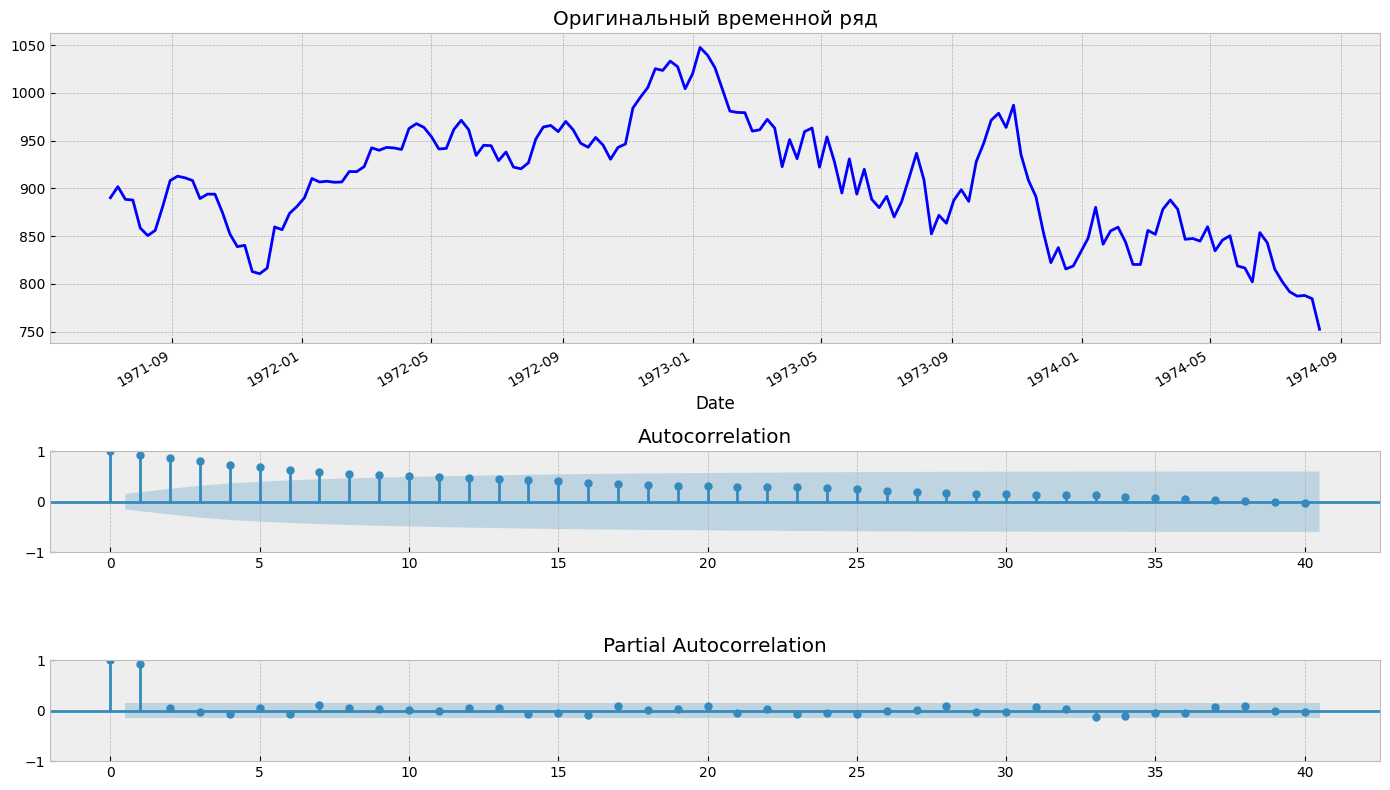


Выполняем тест Дики-Фуллера на стационарность:

Выполняем тест Дики-Фуллера на стационарность...
Статистика теста               -1.314625
p-значение                      0.622455
Использовано лагов              0.000000
Количество наблюдений         161.000000
Критическое значение (1%)      -3.471633
Критическое значение (5%)      -2.879665
Критическое значение (10%)     -2.576434
dtype: float64


,0
Статистика теста,-1.314625
p-значение,0.622455
Использовано лагов,0.000000
Количество наблюдений,161.000000
Критическое значение (1%),-3.471633
Критическое значение (5%),-2.879665
Критическое значение (10%),-2.576434


In [30]:
# Новый ряд: weekly-closings-of-the-dowjones-.csv
# Шаг 1: Загрузка данных
def load_and_preprocess_weekly_dowjones_fixed():
    """
    Загружаем и обрабатываем временной ряд weekly-closings-of-the-dowjones-.csv.
    """
    # Загружаем файл через интерфейс
    print("\nПожалуйста, загрузите файл: weekly-closings-of-the-dowjones-.csv")
    from google.colab import files
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    print(f"\nЗагруженный файл: {file_name}")

    # Читаем файл
    data = pd.read_csv(file_name)

    # Просматриваем структуру данных
    print("\nПросматриваем первые строки данных:")
    print(data.head())

    print("\nПроверяем названия столбцов:")
    print(data.columns)

    # Преобразуем столбец 'Week' в формат datetime
    if 'Week' in data.columns:
        # Преобразуем 'Week' в формат ISO-недель и извлекаем дату начала недели
        data['Date'] = pd.to_datetime(data['Week'] + '-1', format='%Y-W%W-%w')
        data.set_index('Date', inplace=True)  # Устанавливаем временной индекс
    else:
        raise KeyError("В данных отсутствует ожидаемый столбец для временного индекса ('Week').")

    # Переименуем остальные столбцы для удобства
    if 'Close' in data.columns:
        data.rename(columns={'Close': 'Value'}, inplace=True)
    else:
        raise KeyError("В данных отсутствует ожидаемый столбец значений ('Close').")

    # Удаляем столбец 'Week', так как он больше не нужен
    data.drop(columns=['Week'], inplace=True)

    # Проверяем пропуски
    print("\nПроверяем пропуски в данных:")
    print(data.isnull().sum())

    return data

# Загружаем и обрабатываем данные
weekly_dowjones_data = load_and_preprocess_weekly_dowjones_fixed()

# Шаг 2: Визуализация временного ряда
print("\nВизуализация временного ряда weekly-closings-of-the-dowjones-.csv:")
tsplot(weekly_dowjones_data['Value'], lags=40, title='Оригинальный временной ряд')

# Шаг 3: Тест Дики-Фуллера
print("\nВыполняем тест Дики-Фуллера на стационарность:")
test_stationarity(weekly_dowjones_data['Value'])


**На основании полученных данных, результаты теста Дики-Фуллера показывают, что временной ряд weekly-closings-of-the-dowjones-.csv не является стационарным:**

p-значение (0.622455) значительно превышает пороговое значение (например, 0.05), что не позволяет отвергнуть нулевую гипотезу о наличии единичного корня.

График временного ряда показывает наличие тренда, который необходимо удалить для достижения стационарности.

Автокорреляционная и частичная автокорреляционная функции подтверждают наличие сильной автокорреляции на малых лагах.


Применяем преобразование Бокса-Кокса для стабилизации дисперсии...
Оптимальное значение λ для преобразования Бокса-Кокса: 1.1328304249477201

Строим графики временного ряда, автокорреляции и частичной автокорреляции после преобразования Бокса-Кокса...

Строим графики временного ряда, автокорреляции и частичной автокорреляции...


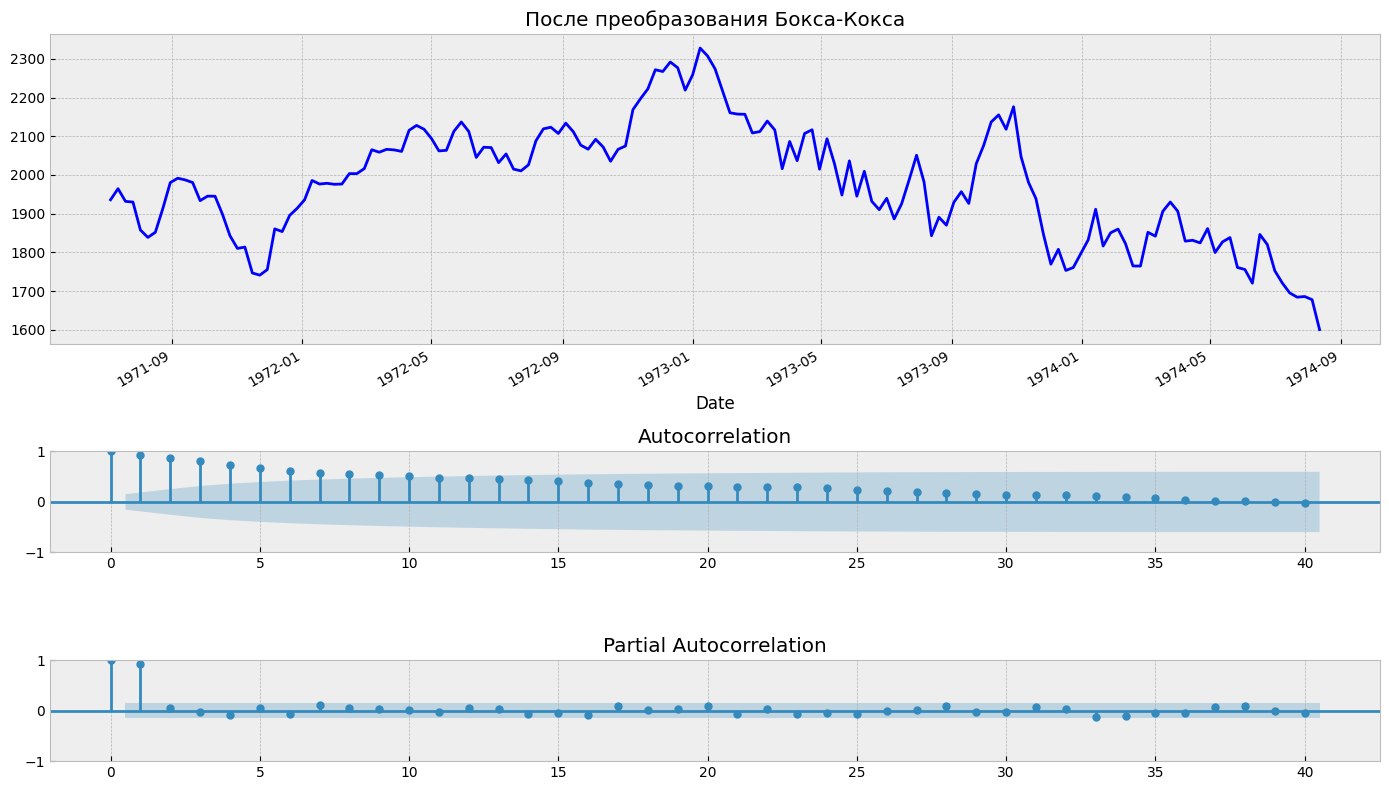


Выполняем тест Дики-Фуллера после преобразования Бокса-Кокса...

Выполняем тест Дики-Фуллера на стационарность...
Статистика теста               -1.327773
p-значение                      0.616372
Использовано лагов              0.000000
Количество наблюдений         161.000000
Критическое значение (1%)      -3.471633
Критическое значение (5%)      -2.879665
Критическое значение (10%)     -2.576434
dtype: float64


,0
Статистика теста,-1.327773
p-значение,0.616372
Использовано лагов,0.000000
Количество наблюдений,161.000000
Критическое значение (1%),-3.471633
Критическое значение (5%),-2.879665
Критическое значение (10%),-2.576434


In [31]:
# Шаг 1: Применяем преобразование Бокса-Кокса для стабилизации дисперсии временного ряда weekly-closings-of-the-dowjones-.csv

from scipy.stats import boxcox

# Преобразование Бокса-Кокса
def apply_boxcox(data):
    """
    Применяет преобразование Бокса-Кокса к временным данным.
    """
    print("\nПрименяем преобразование Бокса-Кокса для стабилизации дисперсии...")
    transformed_data, lambda_value = boxcox(data)  # Преобразование Бокса-Кокса
    print(f"Оптимальное значение λ для преобразования Бокса-Кокса: {lambda_value}")

    return transformed_data, lambda_value

# Выполняем преобразование
weekly_dowjones_data['Transformed'], lambda_boxcox = apply_boxcox(weekly_dowjones_data['Value'])

# Визуализируем результаты преобразования
print("\nСтроим графики временного ряда, автокорреляции и частичной автокорреляции после преобразования Бокса-Кокса...")
tsplot(weekly_dowjones_data['Transformed'], lags=40, title='После преобразования Бокса-Кокса')

# Выполняем тест Дики-Фуллера после преобразования
print("\nВыполняем тест Дики-Фуллера после преобразования Бокса-Кокса...")
test_stationarity(weekly_dowjones_data['Transformed'])


#Выводы:

**Преобразование Бокса-Кокса:**

Значение λ (оптимального параметра) составило 1.1328, что указывает на необходимость легкой трансформации для стабилизации дисперсии.

Визуально дисперсия ряда уменьшилась, но сильный тренд по-прежнему прослеживается.

**Результаты теста Дики-Фуллера после преобразования:**

Статистика теста: -1.328
p-значение: 0.616 (значительно выше 0.05)
Гипотеза о нестационарности не отвергается.

**Ряд по-прежнему не является стационарным.**

**ACF и PACF:**

ACF показывает медленное убывание автокорреляции, что свидетельствует о наличии тренда.

PACF демонстрирует несколько значимых лагов, указывающих на возможное наличие автокорреляции на более высоких временных отрезках.


Проверяем NaN в колонке 'First_Diff':
1

Строим графики временного ряда, автокорреляции и частичной автокорреляции...


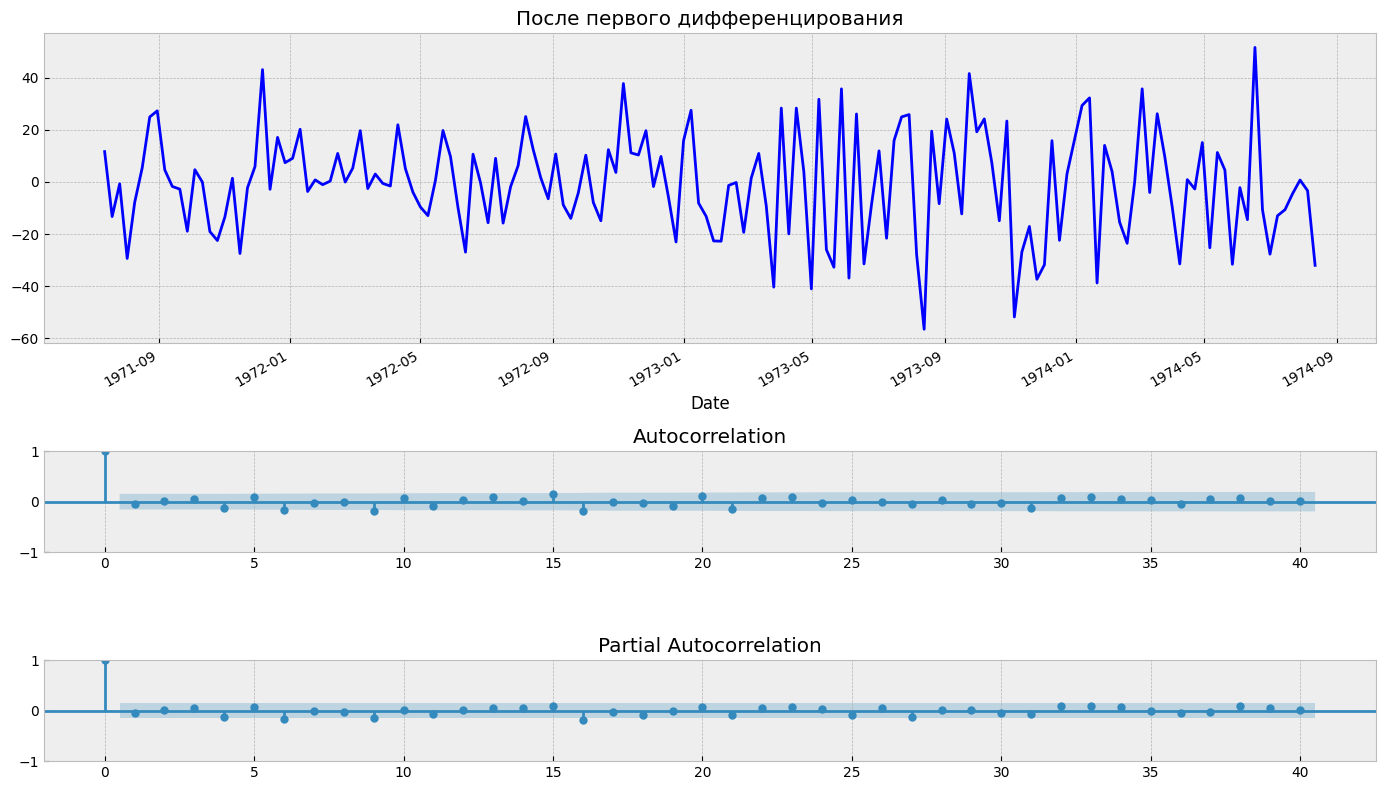


Выполняем тест Дики-Фуллера после первого дифференцирования...

Выполняем тест Дики-Фуллера на стационарность...
Статистика теста             -1.302521e+01
p-значение                    2.407586e-24
Использовано лагов            0.000000e+00
Количество наблюдений         1.600000e+02
Критическое значение (1%)    -3.471896e+00
Критическое значение (5%)    -2.879780e+00
Критическое значение (10%)   -2.576495e+00
dtype: float64


,0
Статистика теста,-1.302521e+01
p-значение,2.407586e-24
Использовано лагов,0.000000e+00
Количество наблюдений,1.600000e+02
Критическое значение (1%),-3.471896e+00
Критическое значение (5%),-2.879780e+00
Критическое значение (10%),-2.576495e+00


In [34]:
# Выполняем первое дифференцирование
weekly_dowjones_data['First_Diff'] = weekly_dowjones_data['Value'].diff()

# Проверяем наличие NaN в колонке 'First_Diff'
print("\nПроверяем NaN в колонке 'First_Diff':")
print(weekly_dowjones_data['First_Diff'].isna().sum())

# Удаляем строки с NaN, которые возникают после дифференцирования
weekly_dowjones_data.dropna(subset=['First_Diff'], inplace=True)

# Строим графики временного ряда, автокорреляции и частичной автокорреляции после первого дифференцирования
tsplot(weekly_dowjones_data['First_Diff'], lags=40, title="После первого дифференцирования")

# Выполняем тест Дики-Фуллера после первого дифференцирования
print("\nВыполняем тест Дики-Фуллера после первого дифференцирования...")
test_stationarity(weekly_dowjones_data['First_Diff'])


#Первое дифференцирование:

После первого дифференцирования автокорреляция и частичная автокорреляция значительно уменьшились.

**Графический анализ:**

После дифференцирования временной ряд демонстрирует отсутствие тренда и снижение автокорреляции на больших лагах.

**Результаты теста Дики-Фуллера:**

Статистика теста: -13.025
p-значение: 2.41e-24 (очень низкое, что указывает на стационарность).

#Ряд стал стационарным.


In [36]:
# Загружаем данные и выполняем предварительную обработку

def load_female_births_data():
    """
    Загружает данные из файла daily-total-female-births-in-cal.csv через интерфейс Colab.
    """
    from google.colab import files

    print("Загрузите файл daily-total-female-births-in-cal.csv через интерфейс Colab.")
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]  # Получаем имя загруженного файла
    data = pd.read_csv(file_name)
    return data

def preprocess_female_births_data(data):
    """
    Выполняет предварительную обработку данных:
    - Преобразует столбец с датами в формат datetime.
    - Устанавливает индексом временной ряд.
    - Проверяет наличие пропусков.
    """
    # Преобразуем дату в формат datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Устанавливаем индексом столбец с датой
    data.set_index('Date', inplace=True)

    # Проверяем пропуски
    print("\nПроверяем пропуски в данных:")
    print(data.isnull().sum())

    return data

# Загружаем и обрабатываем данные
data = load_female_births_data()  # Загружаем файл через интерфейс
data = preprocess_female_births_data(data)  # Обрабатываем данные (преобразование дат, проверка пропусков)

# Просмотр первых строк обработанных данных
print("\nПервые строки обработанных данных:")
print(data.head())


Загрузите файл daily-total-female-births-in-cal.csv через интерфейс Colab.


Saving daily-total-female-births-in-cal.csv to daily-total-female-births-in-cal.csv

Проверяем пропуски в данных:
Count    0
dtype: int64

Первые строки обработанных данных:
            Count
Date             
1959-01-01     35
1959-01-02     32
1959-01-03     30
1959-01-04     31
1959-01-05     44


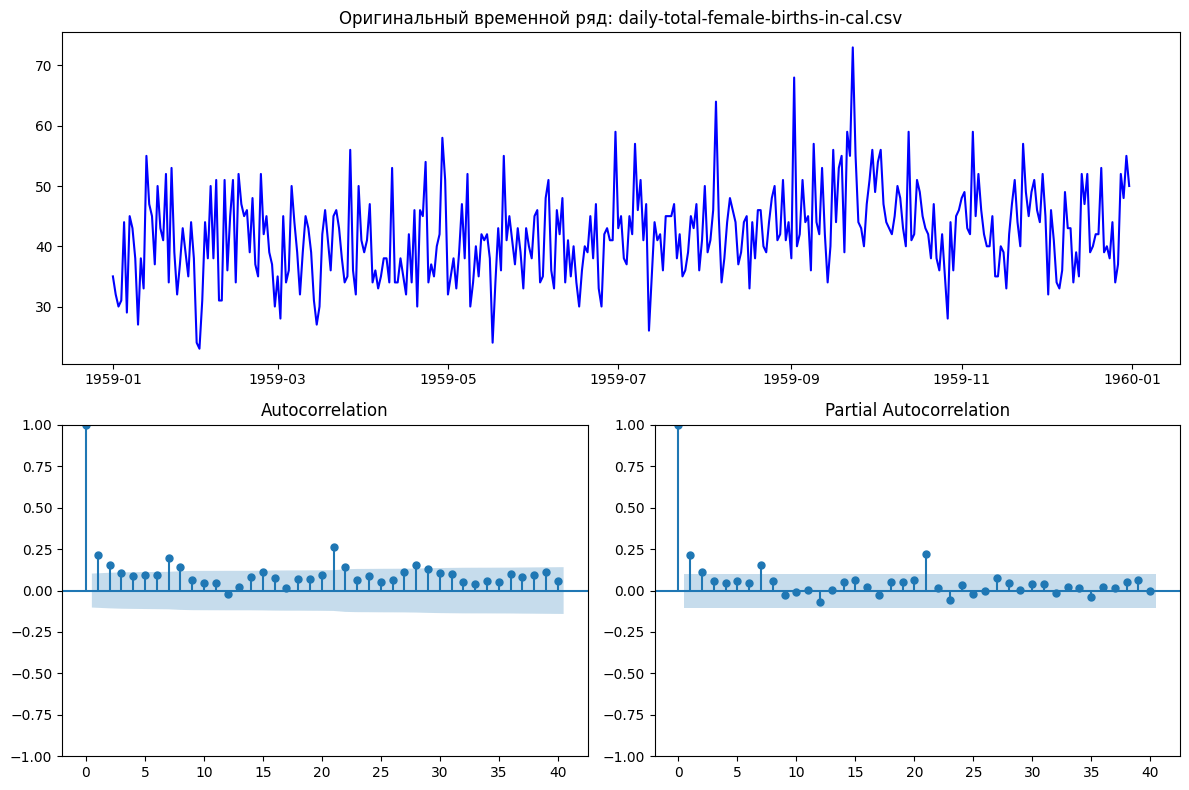


Выполняем тест Дики-Фуллера на стационарность...
Статистика теста               -4.808291
p-значение                      0.000052
Использовано лагов              6.000000
Количество наблюдений         358.000000
Критическое значение (1%)      -3.448749
Критическое значение (5%)      -2.869647
Критическое значение (10%)     -2.571089
dtype: float64


In [37]:
# Визуализация временного ряда, автокорреляции и частичной автокорреляции
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

def tsplot(y, lags=None, title='', figsize=(12, 8)):
    """
    Строит графики временного ряда, автокорреляции и частичной автокорреляции, а также выводит результаты теста Дики-Фуллера.

    Аргументы:
    - y: временной ряд
    - lags: количество лагов для ACF и PACF
    - title: заголовок графиков
    - figsize: размер графиков
    """
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)

    # Временной ряд
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    ts_ax.plot(y, color='blue')
    ts_ax.set_title(title)

    # Автокорреляция
    acf_ax = plt.subplot2grid(layout, (1, 0))
    plot_acf(y, lags=lags, ax=acf_ax)
    acf_ax.set_title('Autocorrelation')

    # Частичная автокорреляция
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    plot_pacf(y, lags=lags, ax=pacf_ax)
    pacf_ax.set_title('Partial Autocorrelation')

    plt.tight_layout()
    plt.show()

    # Тест Дики-Фуллера
    print("\nВыполняем тест Дики-Фуллера на стационарность...")
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Статистика теста', 'p-значение', 'Использовано лагов', 'Количество наблюдений'])
    for key, value in dftest[4].items():
        dfoutput[f'Критическое значение ({key})'] = value
    print(dfoutput)

# Строим графики и выполняем тест
tsplot(data['Count'], lags=40, title="Оригинальный временной ряд: daily-total-female-births-in-cal.csv")


#Выводы:

**Стационарность ряда:**

**Статистика теста Дики-Фуллера: -4.808291.**
p-значение: 0.000052.

Критические значения (1%: -3.448749, 5%: -2.869647, 10%: -2.571089).

Поскольку статистика теста значительно ниже критического значения для 1%, а p-значение меньше 0.05, мы отвергаем нулевую гипотезу о наличии единичного корня.

Это говорит о том, что ряд является стационарным.

**Автокорреляция:**

На ACF видно несколько значимых пиков, однако значительная часть корреляции быстро затухает, что соответствует стационарному ряду.

PACF также показывает отсутствие сильной зависимости на значительном числе лагов.

**Общее состояние ряда:**

Ряд демонстрирует признаки стационарности и не требует дополнительных преобразований (таких как дифференцирование или преобразование Бокса-Кокса).